# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [4]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [5]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [6]:
print adver_data[:5]

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [7]:
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [18]:
X = adver_data.values[:,:3]
Y = adver_data.values[:,3]

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [19]:
means, stds = (X.mean(axis=0),X.std(axis = 0))# Ваш код здесь

In [20]:
X = (X-means)/stds# Ваш код здесь

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [21]:
import numpy as np
X = np.hstack((X,np.ones(X.shape[0]).reshape(X.shape[0],1))) # Ваш код здесь)
print X


[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00  1.00000000e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01  1.00000000e+00]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00  1.00000000e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00  1.00000000e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00  1.00000000e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00  1.00000000e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01  1.00000000e+00]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01  1.00000000e+00]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00  1.00000000e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01  1.00000000e+00]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01  1.00000000e+00]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00  1.00000000e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00  1.00000000e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00  1.00000000e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01  1.00000000e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [31]:
def mserror(y, y_pred):
    return ((y-y_pred)**2).sum()/y.shape[0]

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [32]:
answer1 = mserror(Y, np.array([np.median(Y)]*Y.shape[0]))# Ваш код здесь
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [50]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), Y)  # Ваш код здесь

In [51]:
norm_eq_weights = normal_equation(X, Y)
print(norm_eq_weights)

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [62]:
answer2 = np.dot(np.hstack((np.zeros((200,3)),np.ones((200,1)))), norm_eq_weights)[0]# Ваш код здесь
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [63]:
def linear_prediction(X, w):
    return np.dot(X,w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [64]:
answer3 = mserror(Y, linear_prediction(X, norm_eq_weights))# Ваш код здесь
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [195]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    my = 2*(np.dot(X[train_ind], w)-y[train_ind])#/float(X.shape[0])
    grad0 = 1*my
    grad1 = X[train_ind, 0]*my# Ваш код здесь
    grad2 = X[train_ind, 1]*my# Ваш код здесь
    grad3 = X[train_ind, 2]*my# Ваш код здесь
    return  w - eta * np.array([grad1, grad2, grad3, grad0])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [203]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        new_w = stochastic_gradient_step(X, y, w, random_ind)
        print(new_w)
        weight_dist = ((w-new_w)**2).sum()/4
        w = new_w
        errors.append(mserror(y,linear_prediction(X, w)))
        # Ваш код здесь
        iter_num = iter_num+1
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [204]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, Y, np.array([0,0,0,0]),100000) # Ваш код здесь

[ 0.4602397  -0.26310852 -0.12472707  0.296     ]
[ 0.51178785 -0.47616599 -0.26657692  0.53388492]
[ 0.82732396 -0.21183403  0.23419891  0.91632559]
[1.06056305 0.01594513 0.48310527 1.26640122]
[ 0.84745225 -0.10789321  0.47722654  1.41594475]
[ 0.74949978 -0.24422809  0.48910862  1.64118698]
[ 1.18736747 -0.41485633  0.15552766  1.91104428]
[ 1.43834229 -0.3246347   0.47228892  2.21225041]
[ 1.75745548 -0.50706442  0.38580779  2.41748586]
[ 1.55355217 -0.52144438  0.51020099  2.55365089]
[ 1.76585346 -0.49672727  0.29006606  2.82764164]
[ 1.64645958 -0.16738705  0.71285985  3.10898751]
[ 1.62942091 -0.28000608  0.67043028  3.29504819]
[1.59068703 0.06868661 0.86829761 3.57515316]
[ 1.69469075 -0.02057503  0.74131734  3.79315006]
[ 1.64796758 -0.17478552  0.8696573   3.94679665]
[ 1.59544019 -0.1408785   0.83873458  3.97753557]
[ 1.39377673 -0.11198175  0.76141309  4.14628583]
[1.67152102 0.31493877 0.90421686 4.48923124]
[1.50470866 0.46579005 0.99749917 4.62854616]
[1.4201259  0.69

[ 3.70812736  2.88391901 -0.25292857 13.97888126]
[ 3.67513903  2.91680636 -0.21951599 13.94566727]
[ 3.62567728  2.85178828 -0.23859706 13.99095012]
[ 3.7650719   2.76127163 -0.31770741 13.90521723]
[ 3.77273808  2.76663858 -0.32607977 13.91241934]
[ 3.86429536  2.70786525 -0.30105489 13.85170421]
[ 3.91042599  2.75455097 -0.21644006 13.89926881]
[ 4.21368145  2.55879614 -0.03791448 13.72180433]
[ 4.12598266  2.46560957 -0.03077488 13.78521456]
[ 4.09760831  2.45133694 -0.03700987 13.80414796]
[ 4.1190309   2.43079138 -0.01757111 13.78708851]
[ 4.12038649  2.42864027 -0.02282115 13.79113953]
[ 4.12455783  2.42865745 -0.02814033 13.79820535]
[ 4.16278268  2.54006175  0.05742383 13.86133124]
[ 4.16389169  2.53876088  0.0574489  13.86506195]
[ 4.10352475  2.61804705 -0.09015613 13.80594999]
[ 4.10291315  2.61400462 -0.09167913 13.81262857]
[ 4.11236522  2.6216943  -0.08422969 13.82375414]
[ 4.11094158  2.61860861 -0.0914524  13.83499873]
[ 4.09420031  2.64264859 -0.08687237 13.81104666]


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

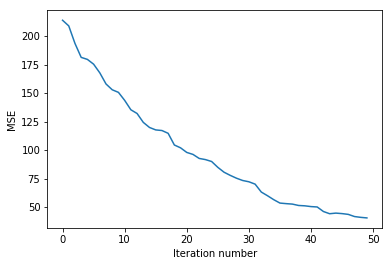

In [205]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

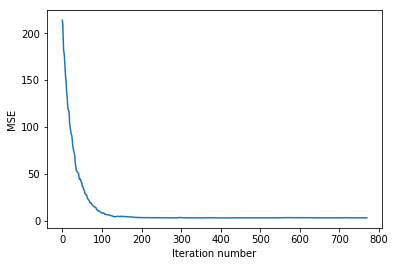

In [206]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [207]:
stoch_grad_desc_weights

array([ 3.98092018,  2.53420182, -0.03520542, 14.04497927])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [208]:
stoch_errors_by_iter[-1]

2.8555687340373566

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [209]:
answer4 = mserror(Y,linear_prediction(X, stoch_grad_desc_weights))# Ваш код здесь
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.8555687340373566


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**